# K Means Algorithm Theory

K Means Clustering is an unsupervised learning algorithm that will attempt to group similar clusters together in your data. So what does a typical problem look like?
- Cluster Similar Documents
- Cluster Customers based on Features
- Market Segmentation
- Identify similar physical groups

The overall goal is to divide data into distinct groups such that observations within each group are similar. 

In [1]:
from IPython.display import Image

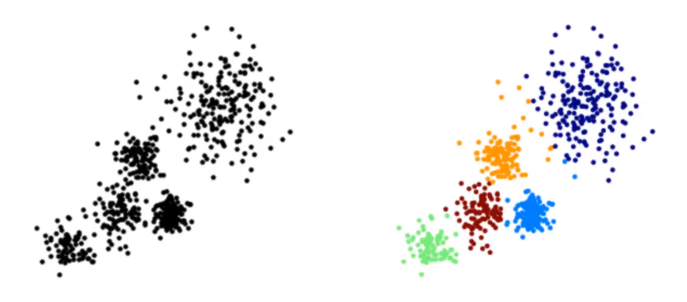

In [2]:
Image(filename='example.PNG')

How does it work?
- Choose a number of Clusters "K"
- Randomly assign each point to a cluster
- Until clusters stop changing, repeat the following:
    - For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
    - Assign each data point to the cluster for which the centroid is the closest

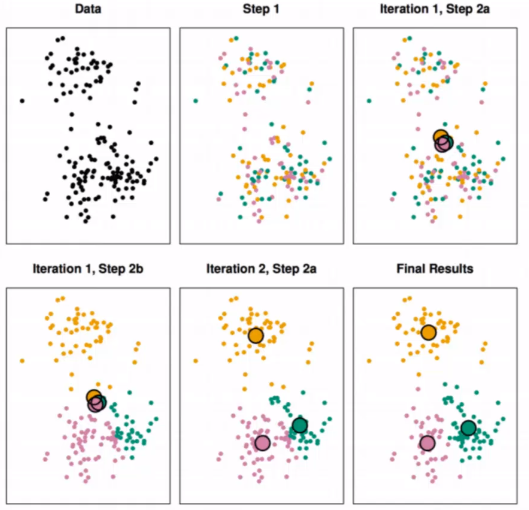

In [3]:
Image(filename='steps.PNG')

How do we choose a K value? We have to decide how many clusters we expect in the data. There is no easy answer for choosing the "best" K value. One way is the elbow method. 

First, compute the sum of squared error (SSE) for some values of K (e.g., 2, 4, 6, 8, etc.). The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid. 

If you plot K against the SSE, you will see that *the error descreases as k gets larger*; this is because whn the number of clusters increases, they should be smaller, so distortion is also smaller. The idea of the elbow method is to choose the K at which the SSE decreases abruptly. The produces an "elbow effect" in the graph.

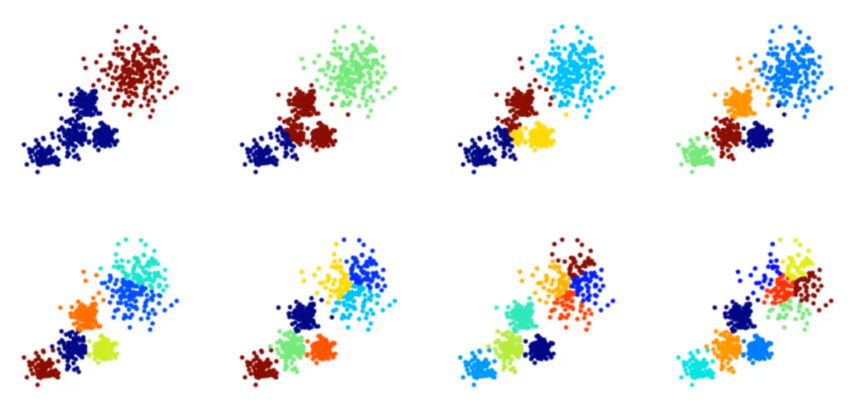

In [4]:
Image(filename='choose_k.PNG')

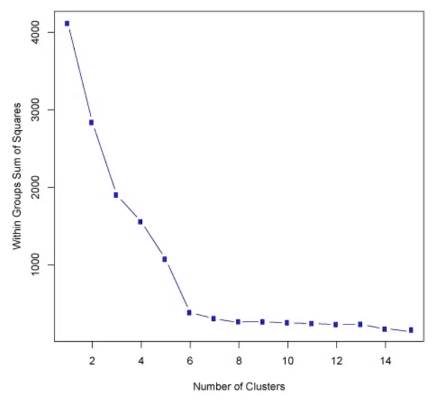

In [5]:
Image(filename='elbowmethod.PNG')

For the plot above, a good K value to choose is 6 or 7. There really is no "correct" K-value, so you may have to use other knowledge to hone in on what might be appropriate. 

# K Means Clustering with Python

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Dark2')

In [7]:
from sklearn.datasets import make_blobs
# This is allowing us to create artificial data that we can play with

In [9]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [14]:
# The data is actually a tuple, and if you grab the first element of the tuple, data[0], you will have a numpy array. 
# This numpy array is your number of samples and the two features. 

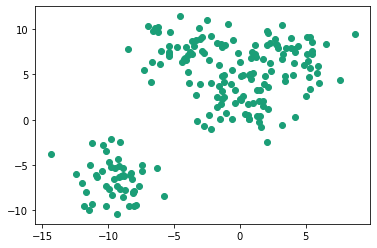

In [21]:
plt.scatter(data[0][:,0], data[0][:,1])

Notice that there it only kind of looks like two blobs, when we expected 4. 

In [23]:
# These are the actual clusters that the data belongs to. 
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

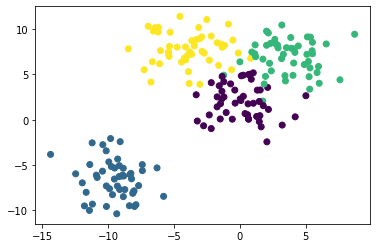

In [25]:
# This adds color based on the cluster the data belongs to. 
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])

Now we are going to implement the K Means Clustering Algorithm

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=4)

In [29]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We can now get the labels that our algorithm believe to be true for the data we sent it 

In [30]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

If we were working with real data and didn't have the labels, we would be done at this stage. But let's plot it out to see how the kmeans compares to our original. 

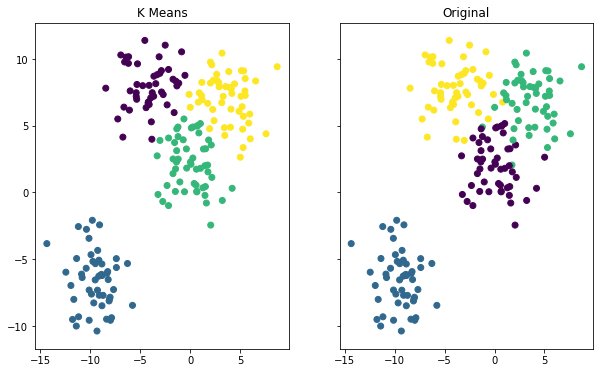

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_)

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1])